In [701]:
# Loading the required libraries

In [768]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, confusion_matrix, f1_score, precision_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt; plt.rcdefaults()
from kerastuner import HyperModel
from kerastuner.tuners import RandomSearch

In [703]:
# loadind data

In [704]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
print('rows: {} \ncols: {}'.format(df.shape[0],df.shape[1]))
df.head()

rows: 7043 
cols: 21


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [705]:
# Let's drop noninformative columns

In [707]:
df.drop(['customerID'], axis = 1, inplace=True)

In [708]:
# Let's see what kind of variables and their type we have

In [710]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [711]:
# Note: TotalCharges has object type, but it is a float number

In [712]:
# Converting TotalCharges to float and filling missing values

In [713]:
def to_float(x):
    try:
        a = float(x)
    except ValueError:
        a = np.nan
    return a

In [714]:
MedianTotalCharges = df['TotalCharges'].apply(lambda x: to_float(x)).median()

In [715]:
df['TotalCharges'] = df['TotalCharges'].apply(lambda x: to_float(x)).fillna(MedianTotalCharges)

In [716]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [717]:
# Save columns with different types into separate variables

In [718]:
object_cols = df.columns[df.dtypes == 'object']
object_cols

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [719]:
int_cols = df.columns[df.dtypes == 'int64']
int_cols

Index(['SeniorCitizen', 'tenure'], dtype='object')

In [720]:
float_cols = df.columns[df.dtypes == 'float64']
float_cols

Index(['MonthlyCharges', 'TotalCharges'], dtype='object')

In [721]:
# Almost every ML algorithm works better with normalized data. Normalizing available only for numeric data

In [722]:
# Let's normalize only float variables

In [723]:
def float_cols_scaler(float_cols):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df[float_cols].values)
    df[float_cols] = scaled_data

In [724]:
float_cols_scaler(float_cols)

In [725]:
df[float_cols].head()

,MonthlyCharges,TotalCharges
0,0.115423,0.001275
1,0.385075,0.215867
2,0.354229,0.010310
3,0.239303,0.210241
4,0.521891,0.015330


In [726]:
# For object variables let's do OneHotEncoding but first print unique values

In [727]:
for col in object_cols:
    print('{} has unique values: {}'.format(col,len(df[col].unique())))

gender has unique values: 2
Partner has unique values: 2
Dependents has unique values: 2
PhoneService has unique values: 2
MultipleLines has unique values: 3
InternetService has unique values: 3
OnlineSecurity has unique values: 3
OnlineBackup has unique values: 3
DeviceProtection has unique values: 3
TechSupport has unique values: 3
StreamingTV has unique values: 3
StreamingMovies has unique values: 3
Contract has unique values: 3
PaperlessBilling has unique values: 2
PaymentMethod has unique values: 4
Churn has unique values: 2


In [728]:
def object_cols_encoder(col):
    le = LabelEncoder()
    ohe = OneHotEncoder(sparse=False)
    if col != 'Churn' and len(df[col].unique()) > 2:
        a = le.fit_transform(df[col]).reshape(-1,1)
        col_names = [col + "_"+str(i)for i in le.classes_]
        temp_df = pd.DataFrame(ohe.fit_transform(a),columns = col_names)
    else:
        a = le.fit_transform(df[col])
        temp_df = pd.Series(a,name = col)
    return temp_df

In [729]:
New_df = df[list(int_cols)+list(float_cols)]
New_df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,0.115423,0.001275
1,0,34,0.385075,0.215867
2,0,2,0.354229,0.010310
3,0,45,0.239303,0.210241
4,0,2,0.521891,0.015330


In [730]:
# Join all hotencoded tables to New_df

In [731]:
for col in object_cols:
    temp_df = object_cols_encoder(col)
    New_df = pd.concat([New_df,temp_df], axis = 1)

In [732]:
New_df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines_No,MultipleLines_No phone service,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,1,0.115423,0.001275,0,1,0,0,0.0,1.0,...,0.0,1.0,0.0,0.0,1,0.0,0.0,1.0,0.0,0
1,0,34,0.385075,0.215867,1,0,0,1,1.0,0.0,...,0.0,0.0,1.0,0.0,0,0.0,0.0,0.0,1.0,0
2,0,2,0.354229,0.010310,1,0,0,1,1.0,0.0,...,0.0,1.0,0.0,0.0,1,0.0,0.0,0.0,1.0,1
3,0,45,0.239303,0.210241,1,0,0,0,0.0,1.0,...,0.0,0.0,1.0,0.0,0,1.0,0.0,0.0,0.0,0
4,0,2,0.521891,0.015330,0,0,0,1,1.0,0.0,...,0.0,1.0,0.0,0.0,1,0.0,0.0,1.0,0.0,1


In [733]:
# Data ready. Let's separate our data to train and test

In [734]:
x_train, x_test, y_train, y_test = train_test_split(New_df.values[:,:-1],
                                                    New_df.values[:,-1],
                                                    test_size = 0.2, 
                                                    random_state = 1)

In [735]:
New_df['Churn'].value_counts()/New_df.shape[0]

0    0.73463
1    0.26537
Name: Churn, dtype: float64

In [736]:
# let's create sequential model using "HyperModel" to find best hyperparameters

In [738]:
class MyHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential()
        for i in range(hp.Int('num_layers', 2, 7)): # hyperparameter_1: layers number
            model.add(Dense(units=hp.Int('units_'+ str(i), 32, 512-(32*i), 32), # hyperparameter_2: units number
                                            input_dim=x_train.shape[1], 
                                            kernel_initializer='normal', 
                                            activation='relu'))
            if i%2 == 0:
                model.add(Dropout(rate = hp.Float('rate_dropout', 0.1, 0.5, 0.1))) # hyperparameter_3: dropout rate
        model.add(Dense(1, activation = 'sigmoid'))
        model.compile(optimizer = Adam(hp.Choice('learning_rate',
                                            values=[1e-2, 1e-3, 1e-4])), # hyperparameter_4: learning rate
                                            loss = 'binary_crossentropy', 
                                            metrics = ['accuracy'])
        return model

In [739]:
# Creating HyperModel

In [740]:
hypermodel = MyHyperModel()

tuner = RandomSearch(
    hypermodel,
    objective='val_accuracy',
    max_trials=20,
    executions_per_trial=3,
    directory='my_dir',
    project_name='Proj_1')

In [742]:
# Tuner find best hyperparameters using RandomSearch

In [743]:
# tuner.search() working like model.fit()

In [744]:
tuner.search(x_train,y_train,
             epochs=20,
             batch_size = 64, 
             validation_data=(x_test,y_test))

Trial 20 Complete [00h 00m 23s]
val_accuracy: 0.8213863174120585

Best val_accuracy So Far: 0.8232789436976115
Total elapsed time: 00h 05m 39s
INFO:tensorflow:Oracle triggered exit


In [745]:
# Pull out best model

In [746]:
model = tuner.get_best_models()[0]

In [747]:
# Let's see structure 

In [748]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 448)               18368     
_________________________________________________________________
dropout (Dropout)            (None, 448)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 160)               71840     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               41216     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 192)               49344     
_________________________________________________________________
dense_4 (Dense)              (None, 192)               3

In [783]:
# Evaluating model

In [749]:
model.evaluate(x_test,y_test)

45/45 [==============================] - 0s 737us/step - loss: 0.3934 - accuracy: 0.8247


[0.39337581396102905, 0.8246983885765076]

In [784]:
# Predicting values

In [785]:
y_pred = model.predict(x_test)

In [ ]:
# Plotting roc_curve. As we can see our model more better than random classifier

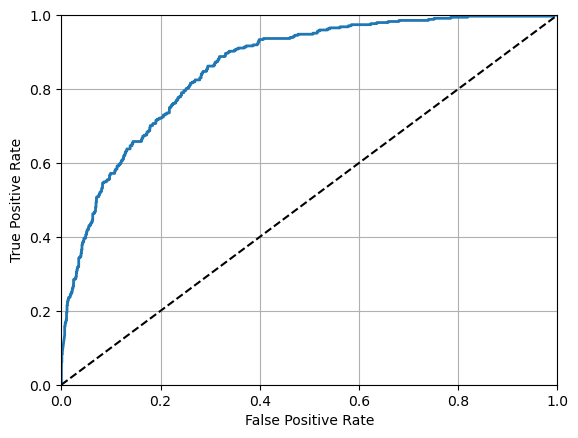

In [786]:
fpr, tpr, _ = roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,linewidth=2)
plt.plot([0,1],[0,1],'k--')
plt.axis([0,1,0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.grid()
plt.show()

In [787]:
# Evaluating roc_auc_score

In [788]:
roc_auc_score(y_test,y_pred)

0.8595569675105897

In [789]:
# What about precision and recall?

In [791]:
# Now our model has threshold prediction = 0.5

In [ ]:
# This means that if the prediction probability is below 0.5 then this is class 0, otherwise class 1

In [792]:
def predictor(threshold):
    return np.where(y_pred < threshold, 0, 1)

In [800]:
def precision_recall_f1(threshold):
    print('Precision: {}'.format(round(precision_score(y_test,predictor(threshold))*100,2)))
    print('Recall: {}'.format(round(recall_score(y_test,predictor(threshold))*100,2)))
    print('F1_score: {}'.format(round(f1_score(y_test,predictor(threshold))*100,2)))

In [801]:
precision_recall_f1(0.5)

Precision: 68.23
Recall: 54.31
F1_score: 60.48


In [802]:
# We can a little bit improve f1_score by moving threshold

In [805]:
precision_recall_f1(0.3)

Precision: 50.09
Recall: 82.18
F1_score: 62.24
